In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('service_dataset.csv')

In [10]:
# Fill missing values example
df['follow_up_date'] = pd.to_datetime(df['follow_up_date'], errors='coerce')
df['follow_up_date'].fillna(method='ffill', inplace=True)

In [11]:
# Convert dates
date_cols = ['last_service_date', 'next_service_due_date', 'feedback_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [12]:
# Drop identifiers
df = df.drop(columns=['customer_id', 'name', 'email', 'mobile_number'])

In [13]:
# Encode categoricals
df = pd.get_dummies(df, columns=['location', 'customer_type', 'make', 'model', 'fuel_type', 'transmission', 'service_center', 'warranty_status', 'insurance_status', 'AMC_status', 'preferred_language'])

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Scale numerical
scaler = StandardScaler()
num_cols = ['age_of_vehicle', 'odometer_reading', 'last_service_cost', 'number_of_services']
df[num_cols] = scaler.fit_transform(df[num_cols])

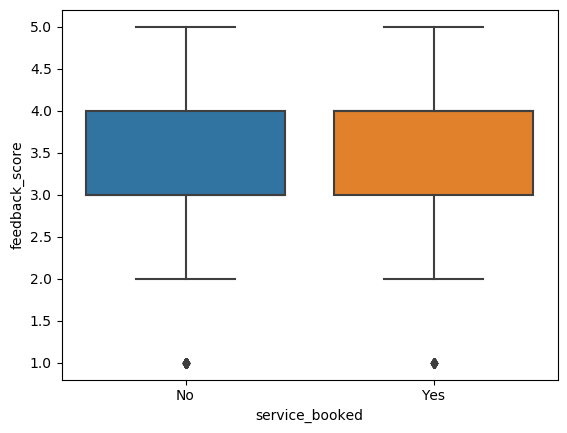

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Example: feedback vs. service booked
sns.boxplot(data=df, x='service_booked', y='feedback_score')
plt.show()


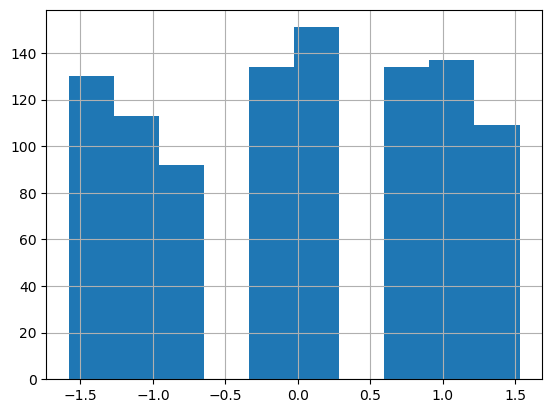

In [16]:
# Histograms
df['age_of_vehicle'].hist()
plt.show()

In [25]:
#!pip install xgboost
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from datetime import datetime

# 🔹 Load your data
df = pd.read_csv("service_dataset.csv")

# 🔹 Handle datetime columns
date_cols = ['last_service_date', 'next_service_due_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[f"{col}_days_ago"] = (datetime.today() - df[col]).dt.days
    df.drop(columns=[col], inplace=True)

# 🔹 Drop or encode problematic columns
drop_cols = ['customer_id', 'name', 'email', 'mobile_number', 'follow_up_date']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

# 🔹 Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns.drop('pending_service')
df = pd.get_dummies(df, columns=categorical_cols)

# 🔹 Encode target variable
df['pending_service'] = df['pending_service'].map({'Yes': 1, 'No': 0})

# 🔹 Define features and target
X = df.drop(columns=['pending_service'])
y = df['pending_service']

# 🔹 Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 1. Random Forest Classifier
print("🌲 Random Forest Classifier")
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print(classification_report(y_test, rf_preds))

# ✅ 2. XGBoost Classifier
try:
    print("⚡ XGBoost Classifier")
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train)
    xgb_preds = xgb.predict(X_test)
    print(classification_report(y_test, xgb_preds))
except ModuleNotFoundError as e:
    print("🛑 Please install xgboost package using: pip install xgboost")

# ✅ 3. Logistic Regression
print("📈 Logistic Regression")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
log_preds = logreg.predict(X_test)
print(classification_report(y_test, log_preds))

🌲 Random Forest Classifier
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       103
           1       0.92      0.81      0.86        97

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200

⚡ XGBoost Classifier
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       103
           1       0.89      0.92      0.90        97

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200

📈 Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       103
           1       0.85      0.87      0.86        97

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weig

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from datetime import datetime

# -------------------------------
# 🔹 1. Load Dataset
# -------------------------------
df = pd.read_csv("service_dataset.csv")

# -------------------------------
# 🔹 2. Date Handling
# -------------------------------
date_cols = ['last_service_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[f"{col}_days_ago"] = (datetime.today() - df[col]).dt.days
    df.drop(columns=[col], inplace=True)

# -------------------------------
# 🔹 3. Drop/Transform Columns
# -------------------------------
# Conditional drops in case some fields don't exist
drop_cols = ['customer_id', 'name', 'email', 'mobile_number', 'follow_up_date']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

# -------------------------------
# 🔹 4. Handle Missing Values
# -------------------------------
df = df.dropna(subset=['next_service_due_days'])  # Drop rows where target is missing

# -------------------------------
# 🔹 5. Encode Categorical Columns
# -------------------------------
categorical_cols = df.select_dtypes(include='object').columns.drop(['pending_service'], errors='ignore')
df = pd.get_dummies(df, columns=categorical_cols)

# -------------------------------
# 🔹 6. Prepare Features for Regression
# -------------------------------
y_reg = df['next_service_due_days']
X_reg = df.drop(columns=['next_service_due_days', 'pending_service'], errors='ignore')

# -------------------------------
# 🔹 7. Split and Scale
# -------------------------------
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

# -------------------------------
# ✅ 8. Random Forest Regressor
# -------------------------------
print("🌲 Random Forest Regressor")
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train_reg)
rf_preds = rf_reg.predict(X_test_scaled)

rf_mae = mean_absolute_error(y_test_reg, rf_preds)
rf_r2 = r2_score(y_test_reg, rf_preds)
print(f"MAE: {rf_mae:.2f}")
print(f"R² Score: {rf_r2:.2f}")

# -------------------------------
# ✅ 9. Linear Regression
# -------------------------------
print("📈 Linear Regression")
lr_reg = LinearRegression()
lr_reg.fit(X_train_scaled, y_train_reg)
lr_preds = lr_reg.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test_reg, lr_preds)
lr_r2 = r2_score(y_test_reg, lr_preds)
print(f"MAE: {lr_mae:.2f}")
print(f"R² Score: {lr_r2:.2f}")

🌲 Random Forest Regressor
MAE: 18.13
R² Score: 0.78
📈 Linear Regression
MAE: 14.74
R² Score: 0.83


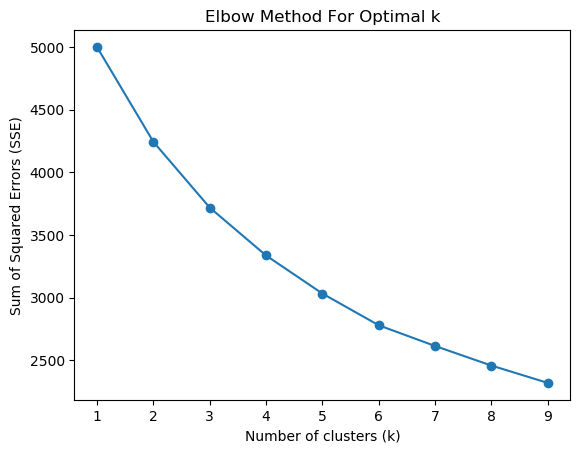

Silhouette Score: 0.15
Cluster Profile Summary:
         age_of_vehicle  odometer_reading  number_of_services  feedback_score  \
Cluster                                                                         
0              4.032129      83357.931727            6.052209        3.650602   
1              6.862963      33821.985185            4.907407        3.981481   
2              8.552239      88302.671642            5.044776        3.582090   
3              6.615023      55987.389671            6.051643        1.699531   

         last_service_cost  
Cluster                     
0              9258.132530  
1              8427.696296  
2              9041.354478  
3              9626.474178  


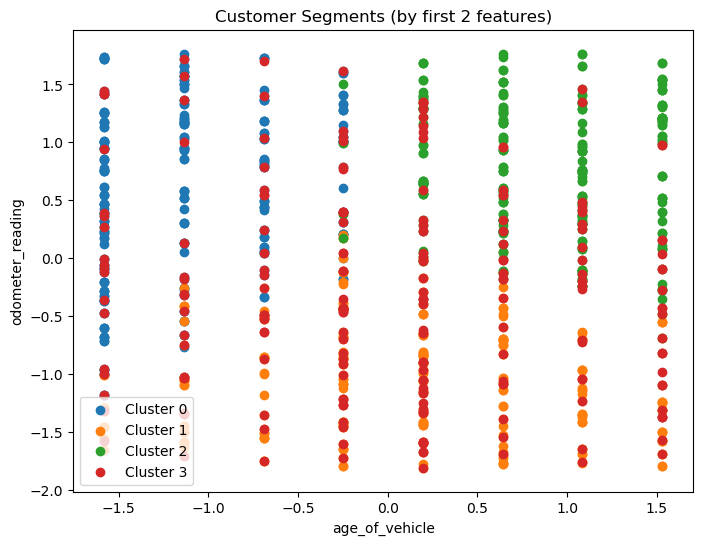

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load and Prepare Data
# -------------------------------
df = pd.read_csv('service_dataset.csv')

# Example: Choose features for segmentation (customize for your dataset)
segment_features = [
    'age_of_vehicle',
    'odometer_reading',
    'number_of_services',
    'feedback_score',
    'last_service_cost'
]
df_segment = df[segment_features].copy()
df_segment = df_segment.dropna()

# -------------------------------
# 2. Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_segment)

# -------------------------------
# 3. Elbow Method to Choose Cluster Number
# -------------------------------
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1,10), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Usually, you "eyeball" the curve and pick k at the 'elbow' point
optimal_k = 4  # Example (set this based on your elbow plot)

# -------------------------------
# 4. Fit KMeans Model and Assign Clusters
# -------------------------------
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_segment['Cluster'] = kmeans.fit_predict(X_scaled)

# (Optional) Silhouette Score
sil_score = silhouette_score(X_scaled, df_segment['Cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

# -------------------------------
# 5. Cluster Profiles & Summary
# -------------------------------
profile = df_segment.groupby('Cluster').mean()
print("Cluster Profile Summary:")
print(profile)

# -------------------------------
# 6. Visualize Clusters
# -------------------------------
plt.figure(figsize=(8,6))
for i in range(optimal_k):
    plt.scatter(
        X_scaled[df_segment['Cluster']==i, 0], 
        X_scaled[df_segment['Cluster']==i, 1], 
        label=f'Cluster {i}'
    )
plt.xlabel(segment_features[0])
plt.ylabel(segment_features[1])
plt.legend()
plt.title('Customer Segments (by first 2 features)')
plt.show()

# Attach cluster labels back to main dataframe for product use
df['segment'] = -1
df.loc[df_segment.index, 'segment'] = df_segment['Cluster']